# Scroll down for EDA on mental health providers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kff.org/other/state-indicator/opioid-overdose-death-rates/?currentTimeframe=1&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [2]:
rx_state_df = pd.read_csv('data/opioid_rx_state_level.csv')
rx_state_df = rx_state_df.drop(columns=['Unnamed: 3'])
rx_state_df.sort_values(by='Dispensing_Rate', ascending=False).head(10)

,Year,State,Dispensing_Rate
201,2009,WV,146.9
150,2008,WV,145.5
306,2012,AL,143.8
252,2010,WV,143.1
357,2013,AL,142.4
246,2010,TN,140.0
303,2011,WV,139.6
297,2011,TN,138.5
195,2009,TN,138.4
272,2011,KY,137.0


In [3]:
rx_state_df.isnull().sum()

Year               0
State              0
Dispensing_Rate    0
dtype: int64

In [4]:
death_state_df = pd.read_csv('data/opioid_deaths_state.csv')
death_state_df[death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
34,2006,ND,NSD,NR
50,2006,WY,NR,10.6
52,2007,AK,NR,10.1
85,2007,ND,NR,4.8
161,2009,DC,NSD,4.1
187,2009,ND,NSD,4.4
238,2010,ND,NSD,3.4
289,2011,ND,NSD,NSD
340,2012,ND,NSD,3.1
391,2013,ND,NSD,2.8


In [5]:
death_state_df = death_state_df[~death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]
death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'] = death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].astype(float)
death_state_df.sort_values(by='Opioid Overdose Death Rate (Age-Adjusted)', ascending=False).head(10)

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
762,2020,WV,70.0,81.4
609,2017,WV,49.6,57.8
722,2020,DC,45.3,58.1
721,2020,DE,43.9,47.3
558,2016,WV,43.4,52
670,2019,DE,43.0,48
660,2018,WV,42.4,51.5
711,2019,WV,41.4,52.8
734,2020,MD,40.4,44.6
731,2020,KY,40.2,49.2


Text(0, 0.5, 'Opioid Dispensing Rate (per 100,000 persons)')

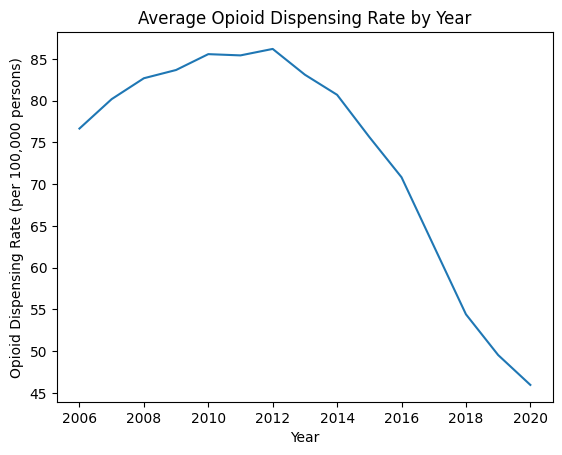

In [17]:
rx_state_df.groupby('Year').Dispensing_Rate.mean().plot.line()
plt.title('Average Opioid Dispensing Rate by Year')
plt.ylabel('Opioid Dispensing Rate (per 100,000 persons)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100,000 persons)')

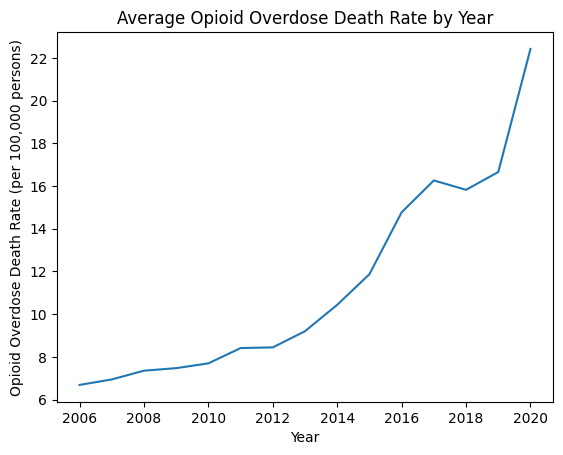

In [18]:
death_state_df.groupby('Year')['Opioid Overdose Death Rate (Age-Adjusted)'].mean().plot.line()
plt.title('Average Opioid Overdose Death Rate by Year')
plt.ylabel('Opioid Overdose Death Rate (per 100,000 persons)')

In [8]:
rx_death = pd.merge(rx_state_df, death_state_df, on=['State', 'Year'])
rx_death.sample(5)

,Year,State,Dispensing_Rate,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
654,2019,AL,85.8,8.9,16.3
594,2017,TX,52.2,5.1,10.5
481,2015,NY,45.1,10.8,13.6
190,2009,TX,71.8,4.6,9.8
587,2017,OK,88.6,10.2,20.1


Text(0.5, 0, 'Opioid Dispensing Rate')

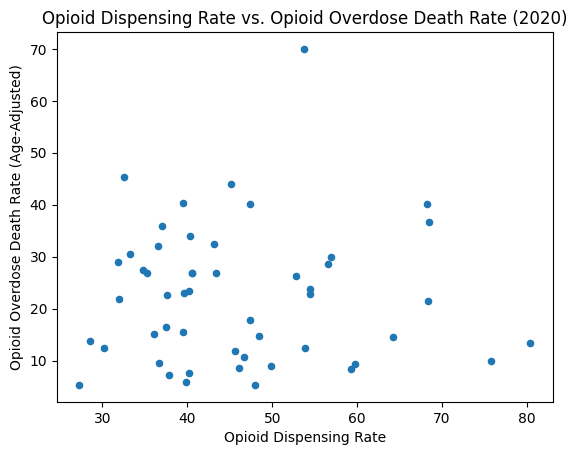

In [9]:
rx_death[rx_death.Year == 2020].plot.scatter(x='Dispensing_Rate', y='Opioid Overdose Death Rate (Age-Adjusted)')
plt.title('Opioid Dispensing Rate vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Opioid Dispensing Rate')


Text(0.5, 0, 'Opioid Dispensing Rate')

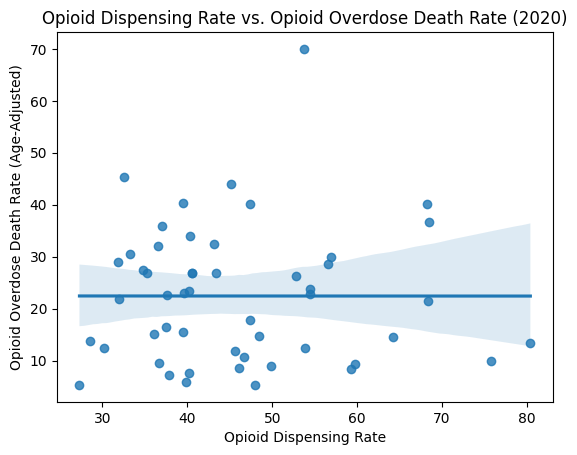

In [19]:
# regplot instead:
sns.regplot(x='Dispensing_Rate', y='Opioid Overdose Death Rate (Age-Adjusted)', data=rx_death[rx_death.Year == 2020])
plt.title('Opioid Dispensing Rate vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Opioid Dispensing Rate')

# BELOW IS MENTAL HEALTH PROVIDERS EDA

In [10]:
sdoh_df = pd.read_excel("./data/SDOH_2020_COUNTY_1_0.xlsx", sheet_name="Data")

In [11]:
mental_health_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'REGION', 'AMFAR_MHFAC_RATE']]
mental_health_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE
1076,21163,Kentucky,Meade County,South,0.0349
370,12097,Florida,Osceola County,South,0.0285
2040,38097,North Dakota,Traill County,Midwest,0.0000
2080,39071,Ohio,Highland County,Midwest,0.0462
2445,47031,Tennessee,Coffee County,South,0.0174


In [12]:
mental_health_df[mental_health_df.AMFAR_MHFAC_RATE.isnull()]

,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE
72,2063,Alaska,Chugach Census Area,West,NaN
73,2066,Alaska,Copper River Census Area,West,NaN
3144,60050,American Samoa,Western District,NaN,NaN
3145,66010,Guam,Guam,NaN,NaN
3146,69100,Northern Mariana Islands,Rota,NaN,NaN
3147,69120,Northern Mariana Islands,Tinian Municipality,NaN,NaN
3226,78010,US Virgin Islands,St. Croix,NaN,NaN
3227,78020,US Virgin Islands,St. John Island,NaN,NaN
3228,78030,US Virgin Islands,St. Thomas Island,NaN,NaN


In [13]:
mental_health_df = mental_health_df[~mental_health_df.AMFAR_MHFAC_RATE.isnull()]
mental_health_df.COUNTYFIPS = mental_health_df.COUNTYFIPS.astype(float)

In [14]:
death_df = pd.read_csv("data/OpioidDeaths_2020.txt", sep="\t")
death_df = death_df.drop(columns="Notes")

death_df = death_df[death_df['Crude Rate'] != 'Unreliable']
death_df['Crude Rate'] = death_df['Crude Rate'].astype(float)
death_df.sort_values(by='Crude Rate', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
878,"McDowell County, WV",54047.0,27.0,16916.0,159.6
877,"Logan County, WV",54045.0,44.0,31688.0,138.9
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
621,"Scioto County, OH",39145.0,95.0,74347.0,127.8
868,"Cabell County, WV",54011.0,112.0,91589.0,122.3
888,"Raleigh County, WV",54081.0,86.0,72920.0,117.9
890,"Wayne County, WV",54099.0,46.0,39054.0,117.8
840,"Petersburg city, VA",51730.0,33.0,30446.0,108.4
727,"Cheatham County, TN",47021.0,39.0,41101.0,94.9
411,"St. Louis city, MO",29510.0,270.0,297645.0,90.7


In [15]:
death_mental_df = death_df.merge(mental_health_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_mental_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE
529,"Henry County, VA",51089.0,28.0,50309.0,55.7,51089.0,Virginia,Henry County,South,0.0596
89,"Leon County, FL",12073.0,25.0,295460.0,8.5,12073.0,Florida,Leon County,South,0.0406
297,"Bernalillo County, NM",35001.0,258.0,681666.0,37.8,35001.0,New Mexico,Bernalillo County,West,0.0205
63,"Middlesex County, CT",9007.0,56.0,161657.0,34.6,9007.0,Connecticut,Middlesex County,Northeast,0.0495
320,"Oswego County, NY",36075.0,28.0,116346.0,24.1,36075.0,New York,Oswego County,Northeast,0.0688


Text(0, 0.5, 'Opioid Overdose Death Rate')

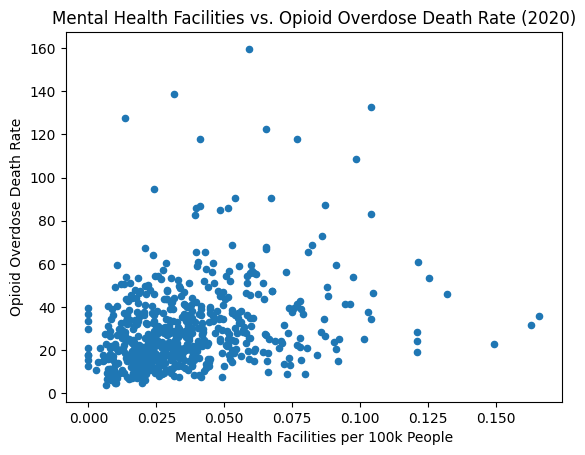

In [16]:
death_mental_df.plot.scatter(x='AMFAR_MHFAC_RATE', y='Crude Rate')
plt.title('Mental Health Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Mental Health Facilities per 100k People')
plt.ylabel('Opioid Overdose Death Rate')

Text(0, 0.5, 'Opioid Overdose Death Rate per 100k People')

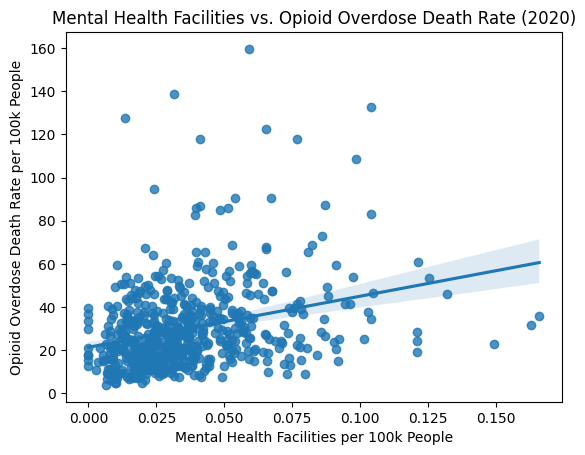

In [20]:
# now as regplot:
sns.regplot(x='AMFAR_MHFAC_RATE', y='Crude Rate', data=death_mental_df)
plt.title('Mental Health Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Mental Health Facilities per 100k People')
plt.ylabel('Opioid Overdose Death Rate per 100k People')

In [32]:
pov_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'ACS_PCT_POV_BLACK', 'SAIPE_PCT_POV']].copy()
pov_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,ACS_PCT_POV_BLACK,SAIPE_PCT_POV
1316,27001,Minnesota,Aitkin County,25.49,11.1
42,1085,Alabama,Lowndes County,27.66,21.9
1765,32510,Nevada,Carson City,11.42,12.5
2853,51065,Virginia,Fluvanna County,8.18,6.8
594,16083,Idaho,Twin Falls County,50.82,11.1


In [33]:
pov_df = pov_df[~pov_df.ACS_PCT_POV_BLACK.isnull()]
pov_df.COUNTYFIPS = pov_df.COUNTYFIPS.astype(float)

In [34]:
death_pov_df = death_df.merge(pov_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_pov_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,ACS_PCT_POV_BLACK,SAIPE_PCT_POV
131,"Kane County, IL",17089.0,76.0,531010.0,14.3,17089.0,Illinois,Kane County,22.10,7.3
561,"Jefferson County, WV",54037.0,30.0,57486.0,52.2,54037.0,West Virginia,Jefferson County,10.56,7.8
25,"Kern County, CA",6029.0,224.0,901362.0,24.9,6029.0,California,Kern County,33.49,18.3
240,"Muskegon County, MI",26121.0,48.0,173883.0,27.6,26121.0,Michigan,Muskegon County,31.59,12.3
228,"Bay County, MI",26017.0,34.0,102387.0,33.2,26017.0,Michigan,Bay County,42.34,12.7


Text(0, 0.5, 'Opioid Overdose Death Rate (per 100k People)')

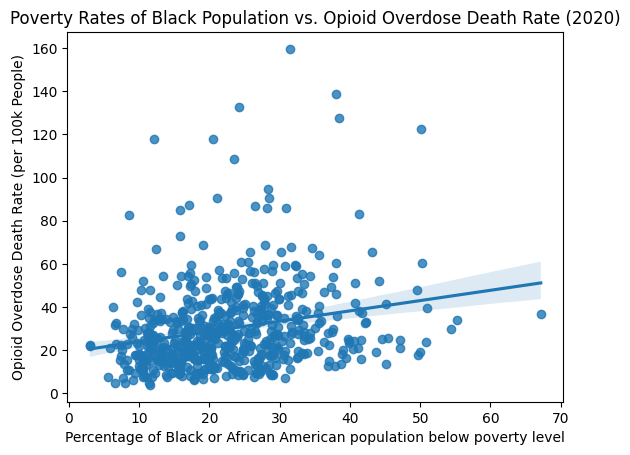

In [35]:
sns.regplot(x='ACS_PCT_POV_BLACK', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates of Black Population vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Percentage of Black or African American population below poverty level')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100k People)')

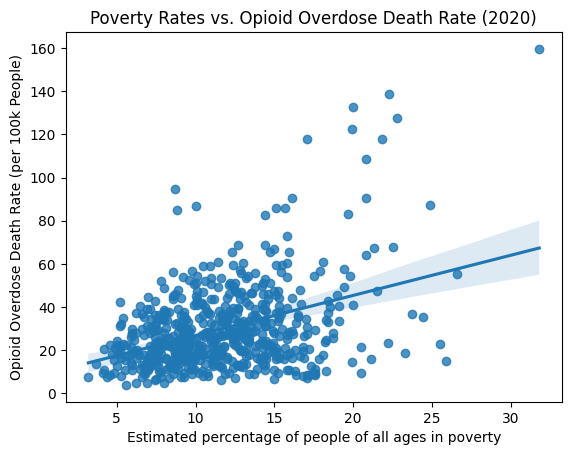

In [36]:
sns.regplot(x='SAIPE_PCT_POV', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Estimated percentage of people of all ages in poverty')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')